__GRUPO 7:__

Beatriz Herguedas Pinedo

Pablo Hernández Aguado

# Práctica 1 · Parte 3 · Regresión

## __Cuestión 0:__ Eliminación del campo _Region_

Antes de empezar vamos a eliminar la variable “Region” del conjunto de datos, ya que no la usaremos para predecir. Además, utiliza la función dropna que elimina de un data frame todas las filas (es decir, observaciones) que tienen un valor perdido (na quiere decir not available) para alguna variable. De esta forma, no tendrás que preocuparte por imputar un valor a dichas observaciones. 

In [1]:
#Importamos la librería y cargamos los datos
import pandas as pd
df = pd.read_csv("countries.csv", index_col = 0)

#Borramos la columna "Region" y los valores nulos
del df["Region"]
countries = df.dropna()
countries

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


## __Cuestión 1:__ Conjunto de datos.

#### Descripción.

El conjunto de datos representa, por cada país, una serie de características sociales, económicas, geográficas y demográficas.

Con estos datos, podemos plantear un problema de regresión consistente en la predicción del PIB de cada país del conjunto, a partir de los datos y variables dadas.

#### Variables.

In [8]:
countries.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP (USD per capita)                  float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

#### Estadísticos descriptivos.

In [9]:
countries.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,1.790000e+02,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,3.421415e+07,5.641830e+05,294.805028,16.495196,-0.206536,38.898156,9125.698324,81.944134,208.151955,14.000447,4.440838,81.558212,2.108939,23.067486,9.465140,0.156905,0.288028,0.554508
std,1.317639e+08,1.395657e+06,1379.352557,73.977601,4.751216,35.353003,9644.123141,19.837537,210.121875,13.152405,8.090331,16.103748,0.697611,11.287207,5.210083,0.151343,0.140310,0.165670
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.188580e+06,1.991500e+04,26.800000,0.090000,-1.315000,9.990000,1800.000000,69.950000,27.100000,3.675000,0.230000,72.825000,2.000000,13.890000,5.795000,0.039000,0.197000,0.424500
50%,6.940432e+06,1.184800e+05,66.900000,0.630000,0.000000,24.310000,5100.000000,90.900000,137.100000,10.530000,1.030000,86.070000,2.000000,20.460000,7.840000,0.101000,0.274000,0.559000
75%,2.086014e+07,4.964410e+05,164.700000,5.355000,0.395000,64.605000,12950.000000,97.800000,335.000000,20.000000,4.600000,94.810000,2.500000,32.315000,11.660000,0.233000,0.349000,0.668500
max,1.313974e+09,9.631420e+06,16183.000000,870.660000,23.060000,163.070000,37800.000000,100.000000,898.000000,62.110000,48.960000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


####  Diagrama de dispersión.

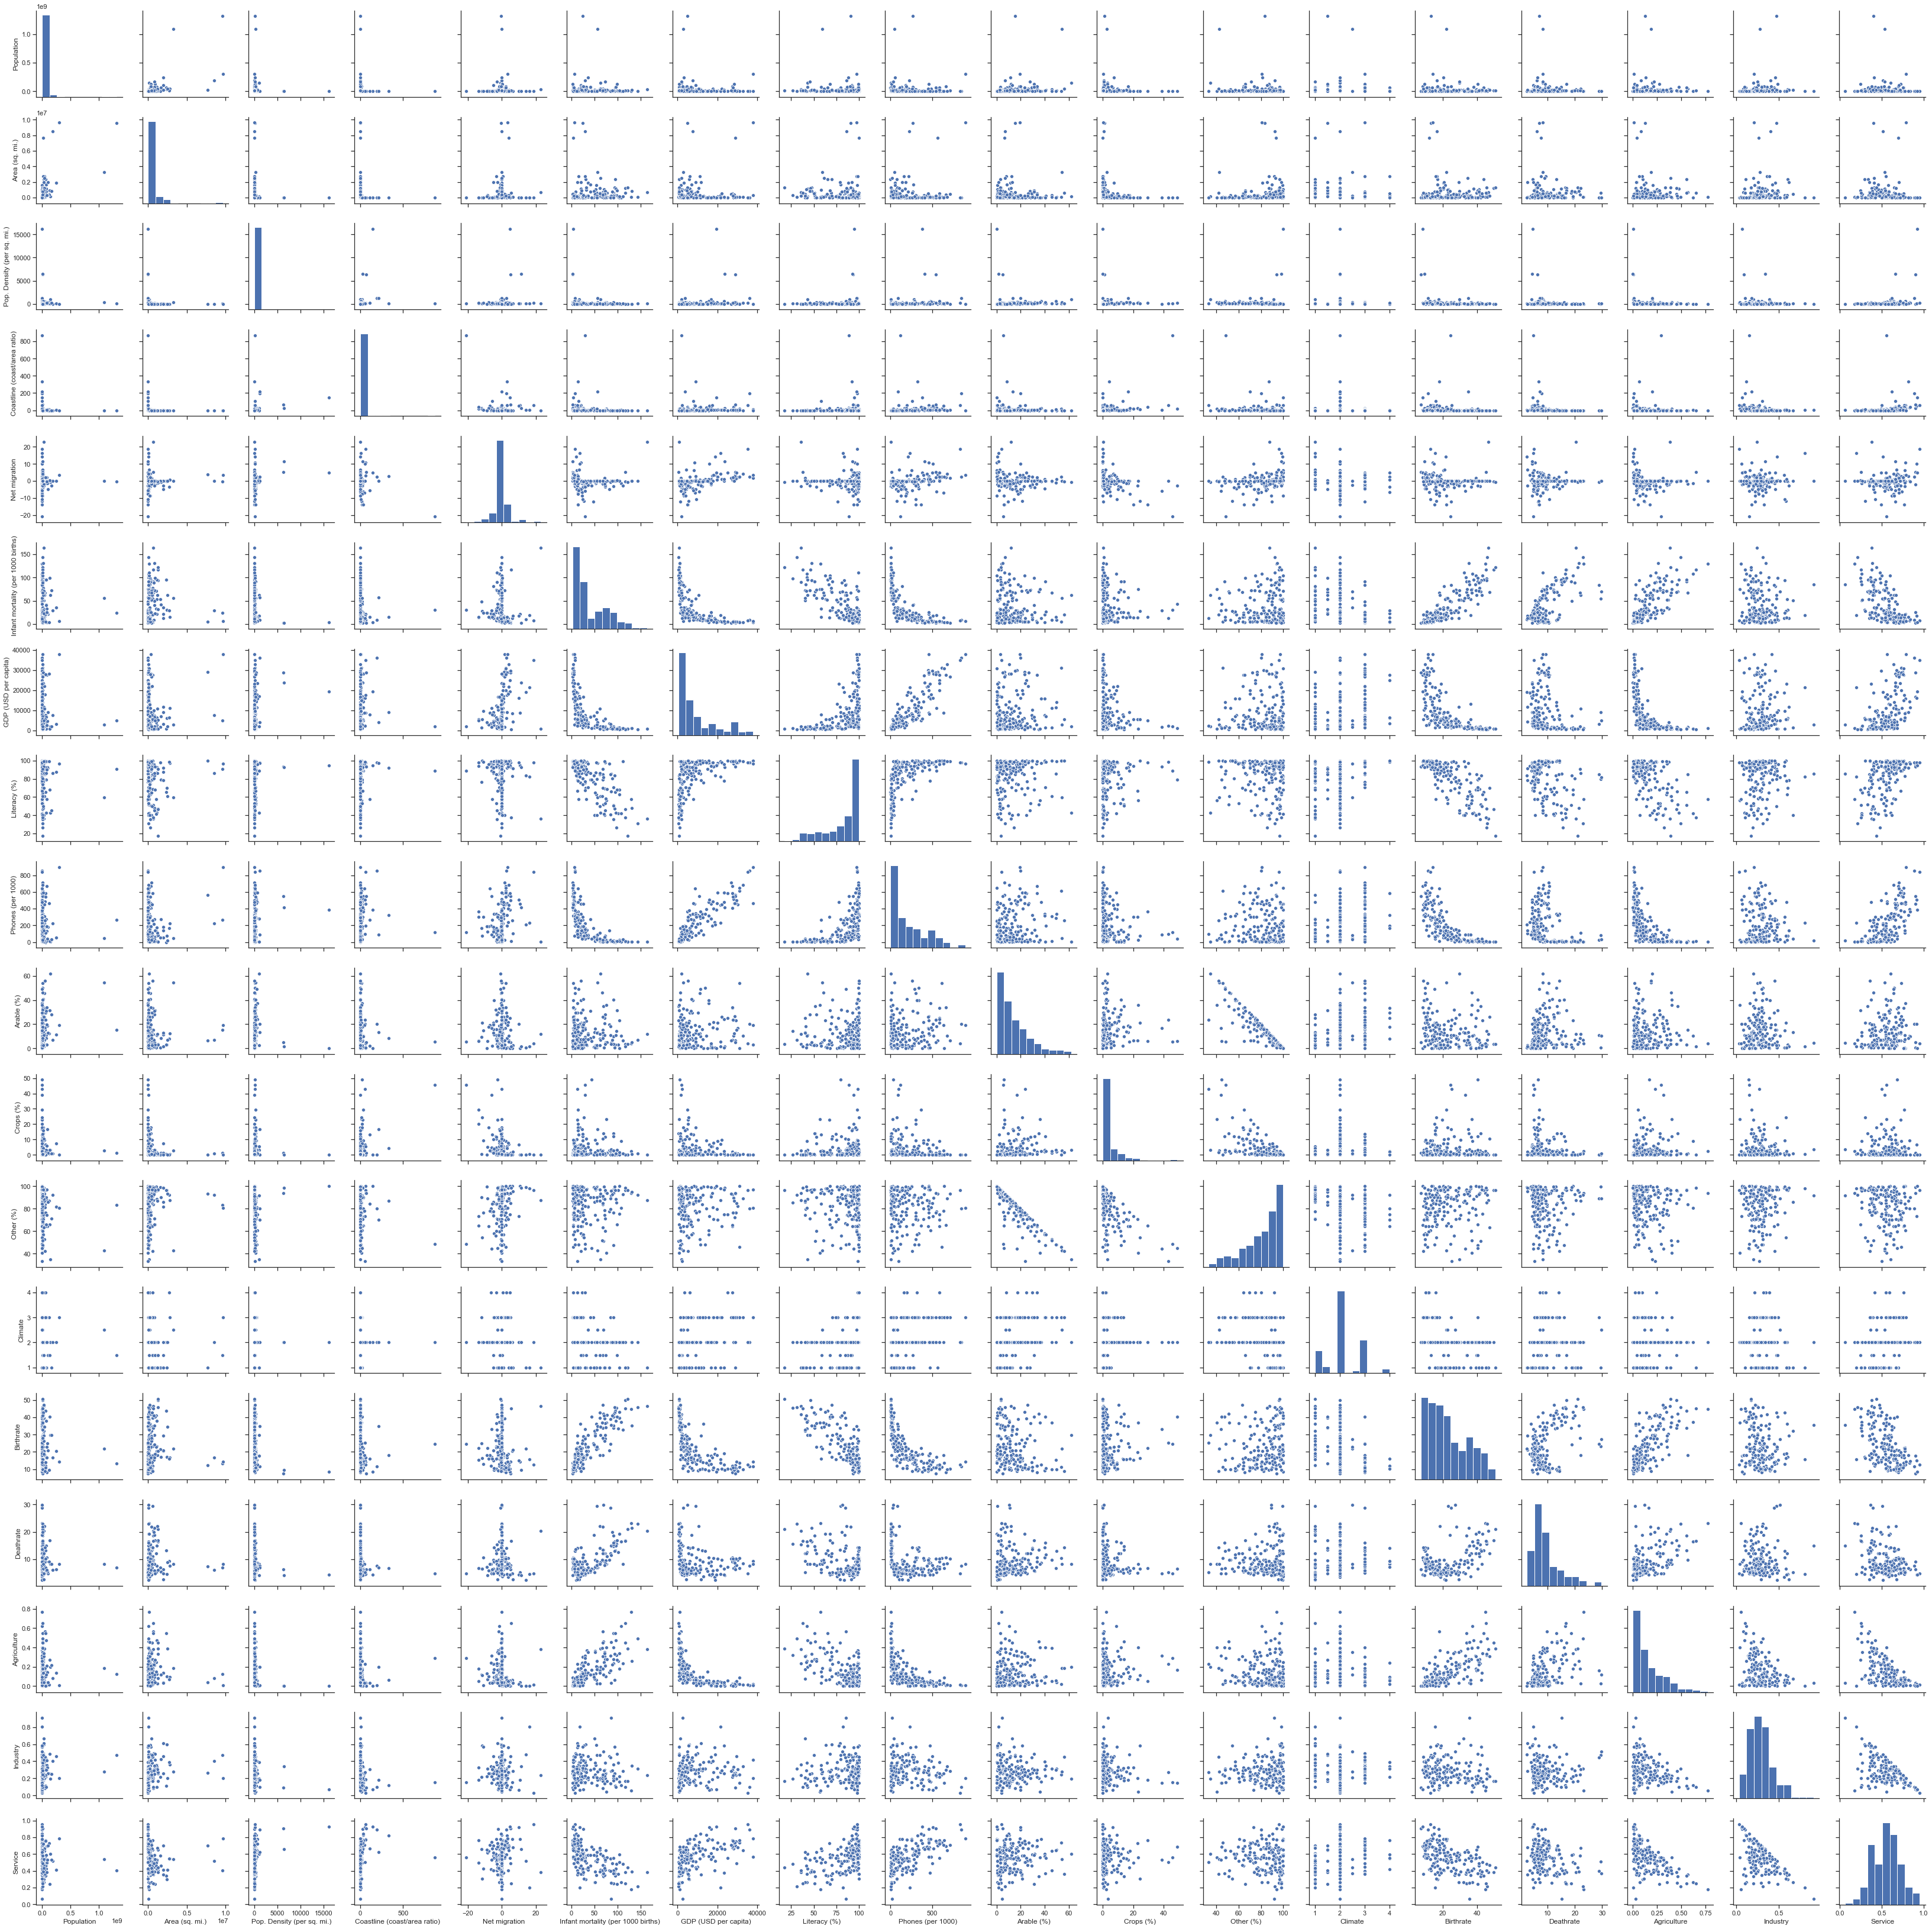

In [2]:
#Sacamos la matriz de gráficos de dispersión
import seaborn as sns
sns.set(style = "ticks")

sns.pairplot(data = countries)

#### Coeficiente de correlación.

In [3]:
#Hallamos el coeficiente de correlación
corrDF = countries.corr()
corrPIB = corrDF["GDP (USD per capita)"]
corrPIB

Population                           -0.033618
Area (sq. mi.)                        0.068356
Pop. Density (per sq. mi.)            0.190122
Coastline (coast/area ratio)          0.035815
Net migration                         0.378790
Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Arable (%)                            0.046465
Crops (%)                            -0.207844
Other (%)                             0.066445
Climate                               0.360567
Birthrate                            -0.658795
Deathrate                            -0.247562
Agriculture                          -0.616919
Industry                              0.032855
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

In [5]:
#Nos quedamos con las variables que tienen más relación con la variable objetivo
most_corrPIB = corrDF[abs(corrPIB) > 0.5]["GDP (USD per capita)"]
most_corrPIB

Infant mortality (per 1000 births)   -0.639090
GDP (USD per capita)                  1.000000
Literacy (%)                          0.522880
Phones (per 1000)                     0.883520
Birthrate                            -0.658795
Agriculture                          -0.616919
Service                               0.536551
Name: GDP (USD per capita), dtype: float64

Las principales variables que se relacionan de forma directamente proporcional con el PIB son _Phones (per 1000)_ , _Literacy_ y _Service_ , pues los países más desarrollados presentan un mejor accesos a la tecnología para sus habitantes, economías en el que el sector Servicios tiene el peso mayoritario y tasas de analfabetismo muy pequeñas.

Por otro lado, aquellas variables que se correlacionan de forma inversa son _Infant mortality_ , _Birthrate_ y _Agriculture_ , ya que los países menos desarrollados están menos envejecidos y presentan un mayor número de nacimientos, pero al también tienen un acceso más limitado a una sanidad de calidad, lo que genera tasas más altas de mortalidad infantil. Además, estos países suelen tener un sector primario con mucho mayor peso en la economía.

## __Cuestión 2:__ Criterio para filtrar variables.

Dado que el coeficiente de correlación en valor absoluto está entre 0 y 1, parece razonable pedir al menos la mitad de su valor alcanzable para tener en cuenta una variable de cara a nuestro objetivo de predecir el PIB. Aplicando este filtro hemos reducido el número de variables a 6, eliminando 11 dimensiones.

In [8]:
#Cambiamos la tabla en base a nuestro filtro
countriesFILT = countries.loc[:,most_corrPIB.index]
countriesFILT

,Infant mortality (per 1000 births),GDP (USD per capita),Literacy (%),Phones (per 1000),Birthrate,Agriculture,Service
Country,,,,,,,
Afghanistan,163.07,700.0,36.0,3.2,46.60,0.380,0.380
Albania,21.52,4500.0,86.5,71.2,15.11,0.232,0.579
Algeria,31.00,6000.0,70.0,78.1,17.14,0.101,0.298
Anguilla,21.03,8600.0,95.0,460.0,14.17,0.040,0.780
Antigua & Barbuda,19.46,11000.0,89.0,549.9,16.93,0.038,0.743
...,...,...,...,...,...,...,...
Venezuela,22.20,4800.0,93.4,140.1,18.71,0.040,0.541
Vietnam,25.95,2500.0,90.3,187.7,16.86,0.209,0.381
Yemen,61.50,800.0,50.2,37.2,42.89,0.135,0.393


## __Cuestión 3:__ Normalización.

Aunque el reescalado de los datos no sería necesario, pues la red neuronal funcionaría perfectamente independientemente de la escala en la que estén, sí que es cierto que funciona más rápido y es menos propensa a atascarse en mínimos locales si realizamos el reescalado.

In [11]:
#Separamos las variables en variables de entrada y de salida
variables_entrada = countriesFILT.loc[:,["Infant mortality (per 1000 births)", "Literacy (%)", "Phones (per 1000)", "Birthrate", "Agriculture", "Service"]]
variables_salida = countriesFILT.loc[:,"GDP (USD per capita)"]
variables_salida

Country
Afghanistan             700.0
Albania                4500.0
Algeria                6000.0
Anguilla               8600.0
Antigua & Barbuda     11000.0
                       ...   
Venezuela              4800.0
Vietnam                2500.0
Yemen                   800.0
Zambia                  800.0
Zimbabwe               1900.0
Name: GDP (USD per capita), Length: 179, dtype: float64

In [12]:
#Estandarizamos los valores
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
valores_entrada = variables_entrada.values
valores_salida = variables_salida.values
valores_entrada_estandarizados = escala.fit_transform(valores_entrada)
valores_salida_estandarizados = escala.fit_transform(valores_salida.reshape(-1,1))
valores_salida_estandarizados

array([[-8.76112089e-01],
       [-4.80984491e-01],
       [-3.25013071e-01],
       [-5.46626094e-02],
       [ 1.94891663e-01],
       [ 2.15687852e-01],
       [-5.84965438e-01],
       [ 1.96256776e+00],
       [ 2.06654870e+00],
       [ 2.17052965e+00],
       [-5.95363532e-01],
       [ 7.87583059e-01],
       [ 8.08379248e-01],
       [-7.51334952e-01],
       [ 6.83602112e-01],
       [-3.14614976e-01],
       [ 2.07694680e+00],
       [-4.39392112e-01],
       [-8.34519710e-01],
       [ 2.79441533e+00],
       [-8.13723521e-01],
       [-6.99344479e-01],
       [-1.30702307e-02],
       [-1.58643556e-01],
       [ 7.14796396e-01],
       [ 9.85146858e-01],
       [-1.58643556e-01],
       [-8.34519710e-01],
       [-7.61733047e-01],
       [-8.86510183e-01],
       [-7.51334952e-01],
       [-7.61733047e-01],
       [-8.03325426e-01],
       [ 2.69043438e+00],
       [-8.34519710e-01],
       [-8.24121615e-01],
       [ 8.05126213e-02],
       [-4.28994018e-01],
       [-2.9

## __Cuestión 4:__ Validación de los perceptrones.

Configuramos una validación cruzada con _k=5_ de dos perceptrones, uno con una capa oculta de 200 neuronas y otro con dos capas ocultas de 50 neuronas cada una, moviendo el parámetro del aprendizaje entre _10<sup>-1</sup>_ y _10<sup>-7</sup>_.

In [13]:
#Configuramos los perceptrones
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np


regul_param_range = 10.0 ** -np.arange(1, 7) 

cv_scores1_mean=[]
cv_scores1_std=[]

cv_scores2_mean=[]
cv_scores2_std=[]

for regul_param in regul_param_range:
    # aumentamos el parámetro max_iter hasta que converja
    mlp1=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=125)
    mlp2=MLPRegressor(hidden_layer_sizes=(50,50, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=125)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, valores_entrada_estandarizados,valores_salida_estandarizados.ravel(), cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, valores_entrada_estandarizados, valores_salida_estandarizados.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores1_mean.append(scores1.mean())
    cv_scores1_std.append(scores1.std())
    
    cv_scores2_mean.append(scores2.mean())
    cv_scores2_std.append(scores2.std())

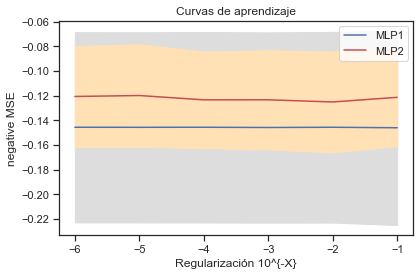

In [14]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
# Como el 
plt.plot(np.log10(regul_param_range), cv_scores1_mean, color="b", label="MLP1")
plt.plot(np.log10(regul_param_range), cv_scores2_mean, color="r", label="MLP2")

# Dibujamos la banda de la desviación típica 1
lower_limit=np.array(cv_scores1_mean)-np.array(cv_scores1_std)
upper_limit=np.array(cv_scores1_mean)+np.array(cv_scores1_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Dibujamos la banda de la desviación típica 2
lower_limit=np.array(cv_scores2_mean)-np.array(cv_scores2_std)
upper_limit=np.array(cv_scores2_mean)+np.array(cv_scores2_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#ffe1b5")


# Creamos el gráfico
plt.title("Curvas de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Claramente uno de los dos perceptrones domina al otro. Es el MLP2 (dibujado en rojo en la gráfica) el que domina al MLP1 porque su error cuadrático medio negativo es superior en todos los valores del parámetro como se puede observar en la gráfica. 

Vemos que ambos son muy estables en sus valores para el parámetro de regularización, con lo cual la elección del mismo no será muy importante, se comportan casi igual independientemente del valor.

Por tanto nos quedamos con el segundo modelo, que además tiene mucha menos desviación típica en sus resultados de la validación, quedándonos con el valor _10<sup>-5</sup>_ para las predicciones, que es ligeramente superior que el resto para el MLP2.

## __Cuestión 5:__ Entrenamiento del perceptrón

Entrenamos al perceptrón con todos nuestros datos y generamos las predicciones para el PIB de cada país en sus escalas originales.

In [15]:
#Entrenamos al perceptrón
from sklearn.model_selection import cross_val_predict


regul_param = 10**-5

mlp=MLPRegressor(hidden_layer_sizes=(50,50, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=125)

predicts_scaled = cross_val_predict(mlp, valores_entrada_estandarizados, valores_salida_estandarizados.ravel(), cv=5)


#Escalamos las predicciones para que estén en la escala original
prediccion = escala.inverse_transform(predicts_scaled)


Text(0.5, 1.0, 'Y Vs Y_pred')

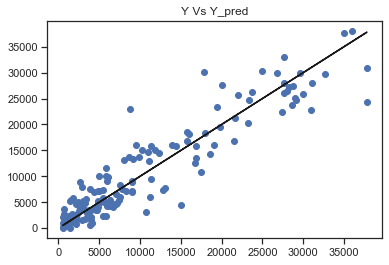

In [16]:
#Pintamos el diagrama de dispersión de la predicción frente al valor real
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(variables_salida, prediccion)
# Pintamos la referencia de la predicción perfecta
ax2.plot(variables_salida, variables_salida, color='k') 

plt.title('Y Vs Y_pred')

Para distinguir a qué países hemos sobreestimado e infraestimado nos creamos un dataframe donde llevamos el valor predicho y el valor real del PIB, y añadimos una columna de porcentaje que representa el porcentaje estimado respecto al valor real (100% es la estimación ideal, por encima es una sobreestimación y por debajo una infraestimación). 

In [20]:
#Creamos la tabla con las 3 columnas
countries["GDP estimated (USD per capita)"] = prediccion
countries ['%'] = countries["GDP estimated (USD per capita)"] / countries["GDP (USD per capita)"] * 100
countriesEST = countries.loc[:, ["GDP estimated (USD per capita)", "GDP (USD per capita)", "%"]]
countriesEST

C:\Lenguajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Lenguajes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GDP estimated (USD per capita),GDP (USD per capita),%
Country,,,
Afghanistan,1171.257295,700.0,167.322471
Albania,3621.415932,4500.0,80.475910
Algeria,9032.271458,6000.0,150.537858
Anguilla,13668.549450,8600.0,158.936622
Antigua & Barbuda,14750.608890,11000.0,134.096444
...,...,...,...
Venezuela,7225.855204,4800.0,150.538650
Vietnam,3239.385587,2500.0,129.575423
Yemen,1485.895802,800.0,185.736975


In [21]:
#Observamos los países sobreestimados en más del triple
countriesEST[abs(countriesEST ['%']) > 300]

,GDP estimated (USD per capita),GDP (USD per capita),%
Country,,,
Burma,5726.868607,1800.0,318.159367
Burundi,2199.249256,600.0,366.541543
Cape Verde,5164.352550,1400.0,368.882325
Congo. Repub. of the,3782.174253,700.0,540.310608
Equatorial Guinea,8990.932067,2700.0,332.997484
Eritrea,2681.230716,700.0,383.032959
Iraq,5401.062682,1500.0,360.070845


In [22]:
#Observamos los países infraestimados en menos de un tercio
countriesEST[abs(countriesEST ['%']) < 30]

,GDP estimated (USD per capita),GDP (USD per capita),%
Country,,,
Guatemala,1058.974418,4100.0,25.828644
Maldives,572.614038,3900.0,14.682411
Sao Tome & Principe,320.761499,1200.0,26.730125
Sierra Leone,70.319616,500.0,14.063923
South Africa,3076.421545,10700.0,28.751603
Uganda,-54.430683,1400.0,-3.887906


Podemos observar que tanto los países en los que se ha sobreestimado el PIB como en los que se ha infraestimado son países en vías de desarrollo, lo que puede ser debido a que dichos países no tienen los medios necesarios para medir los datos con exactitud, por lo que podrían ser erróneos. Por tanto las relaciones que nuestro perceptrón establece entre las variables de las que disponemos, seguramente no se cumplan para estos casos. 

Además, cabe destacar que en Uganda hemos obtenido una estimación del PIB negativo, lo cual no tiene ningún sentido desde nuestro razonamiento, pero dada la manera en la que funciona el perceptrón, es un valor posible. Para solventar este tipo de "incidentes" en un problema de estas características, en el que todos los valores a predecir son no negativos, se podría utilizar la función "relu" en la capa de salida. De esta forma no obtendríamos valores negativos, pues los sustituiríamos por un 0.